In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Random Learn Lib

In [30]:
def read_data(path):
    df = pd.read_csv(path)
    df = df.sort_values(by=["distance", "id", "algorithm"])
    df = df.drop(columns=["duration"])
    return df


df_q005 = read_data("dfa/data/WP/random_learnLib/0005s_10a.csv")
df_q010 = read_data("dfa/data/WP/random_learnLib/0010s_10a.csv")
df_q050 = read_data("dfa/data/WP/random_learnLib/0050s_10a.csv")
df_q100 = read_data("dfa/data/WP/random_learnLib/0100s_10a.csv")


all_df = df_q005.append(df_q010, ignore_index=True).append(df_q050, ignore_index=True).append(df_q100, ignore_index=True)


df_q005.head()

,algorithm,id,num_states,num_alphabet,eq_count,mq_count,distance
1,dfa/TTT,s5_1,6,10,5,16858,1
0,dfa/dynamicTTT,s5_1,6,10,2,16629,1
19,dfa/TTT,s5_10,5,10,4,17659,1
18,dfa/dynamicTTT,s5_10,5,10,1,17576,1
199,dfa/TTT,s5_100,6,10,5,18147,1


In [31]:
def melt_query_type(df):
    df2 = df.melt(
            id_vars=["algorithm", "id", "num_states", "num_alphabet", "distance"],
            var_name="query_type",
            value_name="query_count")
    df2["normalized_query_count"]  = df2["query_count"] / df2["num_states"]
    df2 = df2.sort_values(by=["distance", "id", "query_type", "algorithm"])
    return df2


df_q005_2 = melt_query_type(df_q005)
df_q010_2 = melt_query_type(df_q010)
df_q050_2 = melt_query_type(df_q050)
df_q100_2 = melt_query_type(df_q100)
all_df_2 = melt_query_type(all_df)
df_q005_2.head()

,algorithm,id,num_states,num_alphabet,distance,query_type,query_count,normalized_query_count
0,dfa/TTT,s5_1,6,10,1,eq_count,5,0.833333
1,dfa/dynamicTTT,s5_1,6,10,1,eq_count,2,0.333333
351,dfa/TTT,s5_1,6,10,1,mq_count,16858,2809.666667
352,dfa/dynamicTTT,s5_1,6,10,1,mq_count,16629,2771.500000
2,dfa/TTT,s5_10,5,10,1,eq_count,4,0.800000


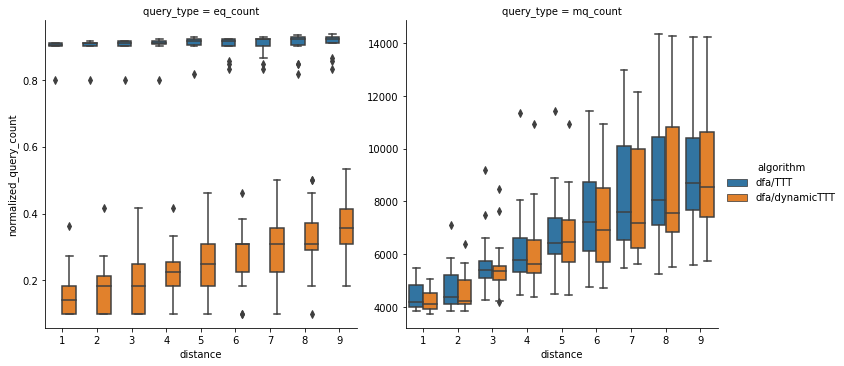

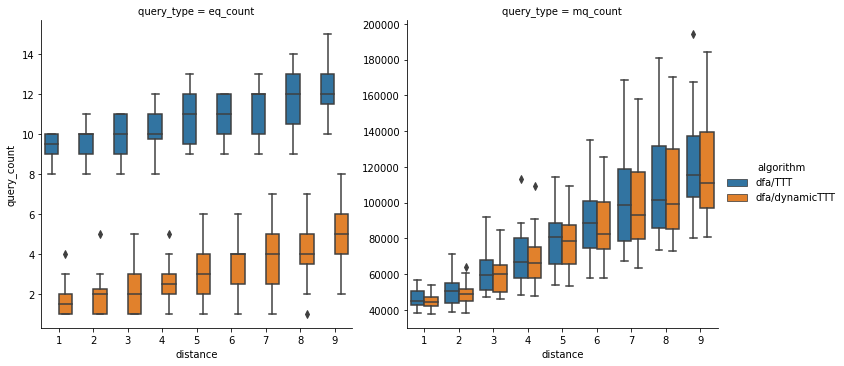

In [34]:
for col in ["normalized_query_count", "query_count"]:
    sns.catplot(kind="box", data=df_q010_2, col="query_type", hue="algorithm", x="distance", y=col, sharey=False)
    plt.show()

In [33]:
def get_related_df(df):
    related_df = pd.DataFrame()

    TTT_df = df[df["algorithm"] =="dfa/TTT"].set_index("id")
    dTTT_df = df[df["algorithm"] == "dfa/dynamicTTT"].set_index("id")

    related_df[["num_states","num_alphabet","distance"]]=dTTT_df[["num_states","num_alphabet","distance"]]

    related_df["related_eq_count"] = dTTT_df["eq_count"]/TTT_df["eq_count"]
    related_df["related_mq_count"] = dTTT_df["mq_count"]/TTT_df["mq_count"]


    related_df["diff_eq_count"] = dTTT_df["eq_count"]-TTT_df["eq_count"]
    related_df["diff_mq_count"] = dTTT_df["mq_count"]- TTT_df["mq_count"]

    related_df[["num_states","num_alphabet","distance"]]=dTTT_df[["num_states","num_alphabet","distance"]]


    related_df["normalized_diff_eq_count"] = related_df["diff_eq_count"]/ related_df["num_states"]
    related_df["normalized_diff_mq_count"] = related_df["diff_mq_count"]/ related_df["num_states"]



    related_df["related_diff_eq_count"] =  related_df["related_eq_count"] - 1
    related_df["related_diff_mq_count"] =  related_df["related_mq_count"] - 1

    # related_df = related_df.sort_values(by="id")
    related_df["state_distance"] = related_df["num_states"].diff()
    related_df.dropna(inplace=True)
    return related_df


related_df_q005 = get_related_df(df_q005)
related_df_q010 = get_related_df(df_q010)
related_df_q050 = get_related_df(df_q050)
related_df_q100 = get_related_df(df_q100)
related_all_df = get_related_df(all_df)

related_df_q005.head()

,num_states,num_alphabet,distance,related_eq_count,related_mq_count,diff_eq_count,diff_mq_count,normalized_diff_eq_count,normalized_diff_mq_count,related_diff_eq_count,related_diff_mq_count,state_distance
id,,,,,,,,,,,,
s5_10,5,10,1,0.25,0.995300,-3.0,-83.0,-0.6,-16.600000,-0.75,-0.004700,-1.0
s5_100,6,10,1,0.40,0.993828,-3.0,-112.0,-0.5,-18.666667,-0.60,-0.006172,1.0
s5_109,5,10,1,0.25,0.982229,-3.0,-300.0,-0.6,-60.000000,-0.75,-0.017771,-1.0
s5_118,5,10,1,0.25,0.985092,-3.0,-249.0,-0.6,-49.800000,-0.75,-0.014908,0.0
s5_127,5,10,1,0.25,0.986942,-3.0,-184.0,-0.6,-36.800000,-0.75,-0.013058,0.0


In [6]:
def get_melted_related_df(related_df, num_states):
    related_df2 = pd.DataFrame()

    for index, row in related_df.iterrows():
        related_df2 = related_df2.append(pd.Series({
            "query_type" : "MQ",
            "related_count" : row["related_mq_count"],
            "diff_count" : row["diff_mq_count"],
            "normalized_diff_count": row["normalized_diff_mq_count"],
            "related_diff_count": row["related_diff_mq_count"],
            "num_states" : row["num_states"],
            "num_alphabet": row["num_alphabet"],
            "distance" : row["distance"],
            "id": index,   
            "state_distance": row["state_distance"]
        }), ignore_index=True)

        related_df2 = related_df2.append(pd.Series({
            "query_type" : "EQ",
            "related_count" : row["related_eq_count"],
            "diff_count" : row["diff_eq_count"],
            "normalized_diff_count": row["normalized_diff_eq_count"],
            "related_diff_count": row["related_diff_eq_count"],
            "num_states" : row["num_states"],
            "num_alphabet": row["num_alphabet"],
            "distance" : row["distance"],
            "id": index, 
            "state_distance": row["state_distance"]
        }), ignore_index=True)

    related_df2["state_distance"] = num_states - related_df2["num_states"]

    return related_df2

related_df_q005_m = get_melted_related_df(related_df_q005, 5)
related_df_q010_m = get_melted_related_df(related_df_q010, 10)
related_df_q050_m = get_melted_related_df(related_df_q050, 50)
related_df_q100_m = get_melted_related_df(related_df_q100, 100)

related_df_q005_m.head()

,diff_count,distance,id,normalized_diff_count,num_alphabet,num_states,query_type,related_count,related_diff_count,state_distance
0,-83.0,1.0,s5_10,-16.600000,10.0,5.0,MQ,0.995300,-0.004700,0.0
1,-3.0,1.0,s5_10,-0.600000,10.0,5.0,EQ,0.250000,-0.750000,0.0
2,-112.0,1.0,s5_100,-18.666667,10.0,6.0,MQ,0.993828,-0.006172,-1.0
3,-3.0,1.0,s5_100,-0.500000,10.0,6.0,EQ,0.400000,-0.600000,-1.0
4,-300.0,1.0,s5_109,-60.000000,10.0,5.0,MQ,0.982229,-0.017771,0.0


In [7]:

def plot_diff_state_distance(related_df_m):
    ax = sns.catplot(  data=related_df_m, x="state_distance", y='related_diff_count', col="query_type", sharey=False)
    for axes in ax.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    plt.show()

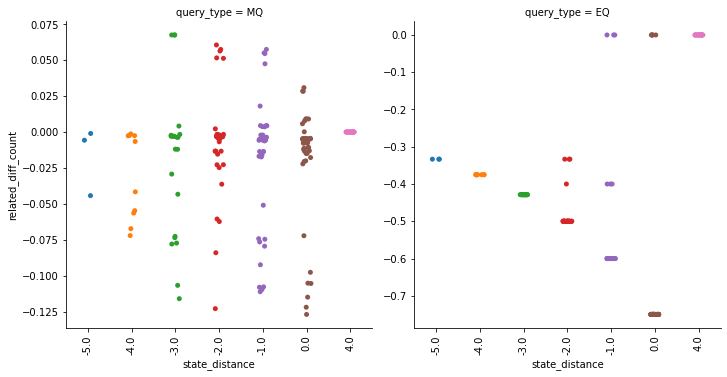

In [8]:
plot_diff_state_distance(related_df_q005_m)

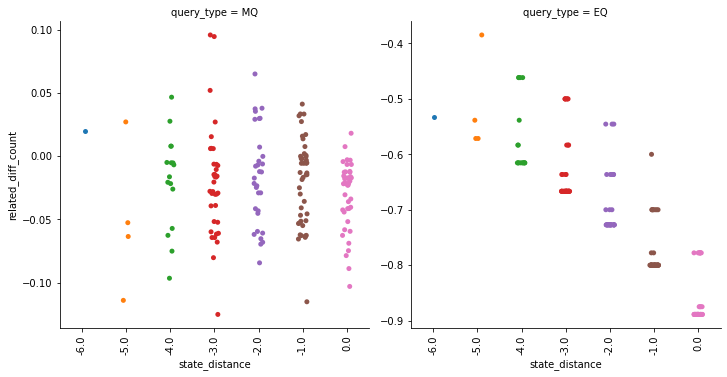

In [9]:
plot_diff_state_distance(related_df_q010_m)

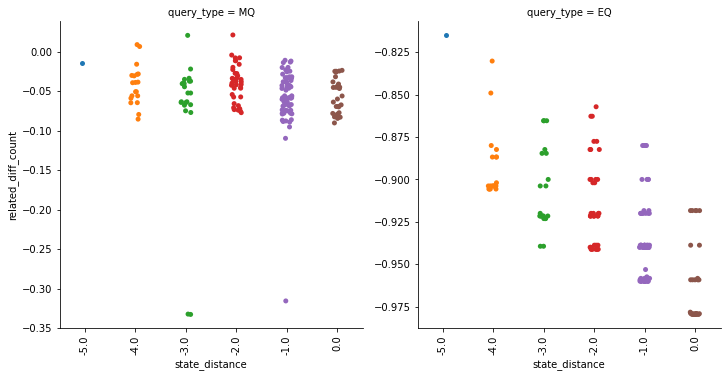

In [10]:
plot_diff_state_distance(related_df_q050_m)

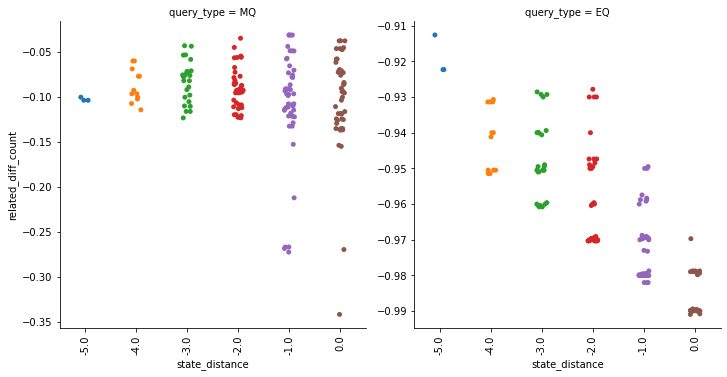

In [11]:
plot_diff_state_distance(related_df_q100_m)

# Remove State LearnLib

In [21]:
df_q005 = read_data("dfa/data/WP/remove_state_learnLib/0005s_10a.csv")
df_q010 = read_data("dfa/data/WP/remove_state_learnLib/0010s_10a.csv")
df_q050 = read_data("dfa/data/WP/remove_state_learnLib/0050s_10a.csv")
df_q100 = read_data("dfa/data/WP/remove_state_learnLib/0100s_10a.csv")


df_q005["distance"] = 5  - df_q005["num_states"]
df_q010["distance"] = 10 - df_q010["num_states"]
df_q050["distance"] = 50 - df_q050["num_states"]
df_q100["distance"] = 100- df_q100["num_states"]


df_q005.head()

,algorithm,id,num_states,num_alphabet,eq_count,mq_count,distance
1,dfa/TTT,s5_1,4,10,3,10229,1
0,dfa/dynamicTTT,s5_1,4,10,1,10245,1
17,dfa/TTT,s5_11,4,10,3,9597,1
16,dfa/dynamicTTT,s5_11,4,10,2,9633,1
23,dfa/TTT,s5_15,4,10,3,9783,1


In [22]:

df_q005_2 = melt_query_type(df_q005)
df_q010_2 = melt_query_type(df_q010)
df_q050_2 = melt_query_type(df_q050)
df_q100_2 = melt_query_type(df_q100)

df_q005_2.head()

,algorithm,id,num_states,num_alphabet,distance,query_type,query_count,normalized_query_count
0,dfa/TTT,s5_1,4,10,1,eq_count,3,0.75
1,dfa/dynamicTTT,s5_1,4,10,1,eq_count,1,0.25
156,dfa/TTT,s5_1,4,10,1,mq_count,10229,2557.25
157,dfa/dynamicTTT,s5_1,4,10,1,mq_count,10245,2561.25
2,dfa/TTT,s5_11,4,10,1,eq_count,3,0.75


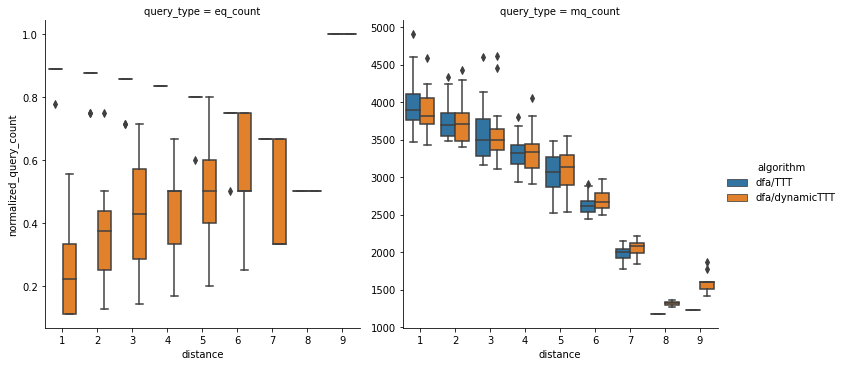

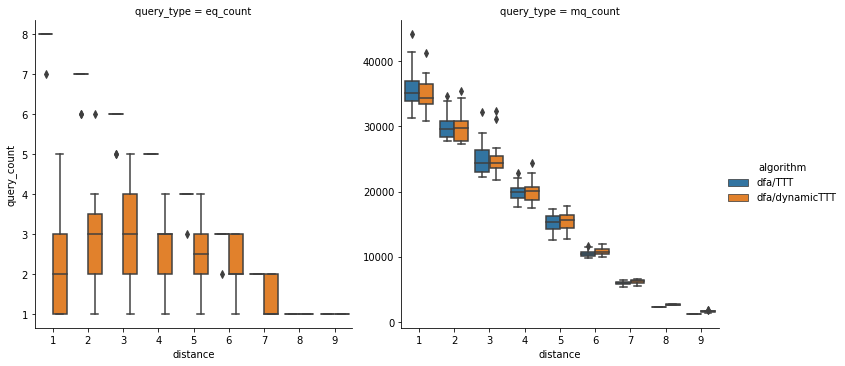

In [23]:
for col in ["normalized_query_count", "query_count"]:
    sns.catplot(kind="box", data=df_q010_2, col="query_type", hue="algorithm", x="distance", y=col, sharey=False)
    plt.show()

In [24]:
related_df_q005 = get_related_df(df_q005)
related_df_q010 = get_related_df(df_q010)
related_df_q050 = get_related_df(df_q050)
related_df_q100 = get_related_df(df_q100)


related_df_q005.head()

,num_states,num_alphabet,distance,related_eq_count,related_mq_count,diff_eq_count,diff_mq_count,normalized_diff_eq_count,normalized_diff_mq_count,related_diff_eq_count,related_diff_mq_count,state_distance
id,,,,,,,,,,,,
s5_11,4,10,1,0.666667,1.003751,-1,36,-0.25,9.00,-0.333333,0.003751,0.0
s5_15,4,10,1,0.333333,0.991823,-2,-80,-0.50,-20.00,-0.666667,-0.008177,0.0
s5_20,4,10,1,0.666667,1.004417,-1,41,-0.25,10.25,-0.333333,0.004417,0.0
s5_25,4,10,1,0.666667,1.005750,-1,62,-0.25,15.50,-0.333333,0.005750,0.0
s5_30,4,10,1,0.666667,0.999784,-1,-2,-0.25,-0.50,-0.333333,-0.000216,0.0


In [25]:
related_df_q005_m = get_melted_related_df(related_df_q005, 5)
related_df_q010_m = get_melted_related_df(related_df_q010, 10)
related_df_q050_m = get_melted_related_df(related_df_q050, 50)
related_df_q100_m = get_melted_related_df(related_df_q100, 100)


related_df_q005_m.head()

,diff_count,distance,id,normalized_diff_count,num_alphabet,num_states,query_type,related_count,related_diff_count,state_distance
0,36.0,1.0,s5_11,9.00,10.0,4.0,MQ,1.003751,0.003751,1.0
1,-1.0,1.0,s5_11,-0.25,10.0,4.0,EQ,0.666667,-0.333333,1.0
2,-80.0,1.0,s5_15,-20.00,10.0,4.0,MQ,0.991823,-0.008177,1.0
3,-2.0,1.0,s5_15,-0.50,10.0,4.0,EQ,0.333333,-0.666667,1.0
4,41.0,1.0,s5_20,10.25,10.0,4.0,MQ,1.004417,0.004417,1.0


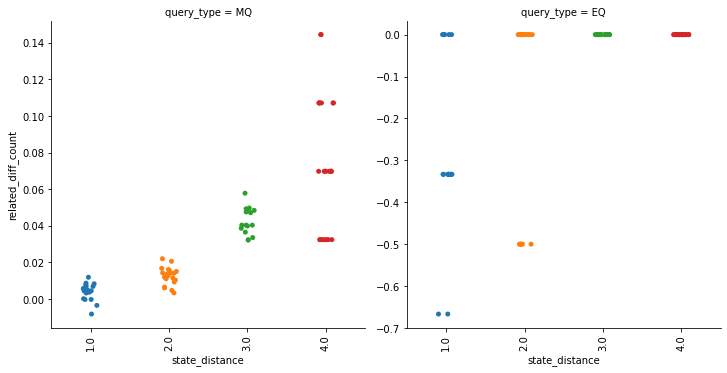

In [26]:
plot_diff_state_distance(related_df_q005_m)

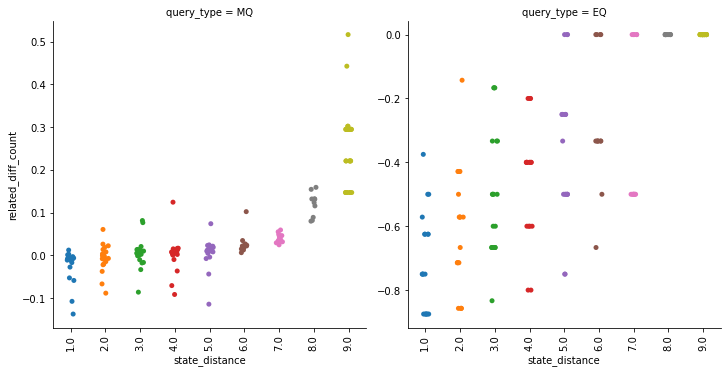

In [27]:
plot_diff_state_distance(related_df_q010_m)

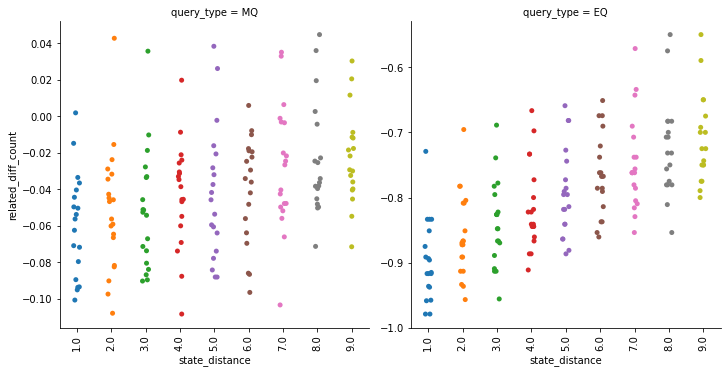

In [28]:
plot_diff_state_distance(related_df_q050_m)

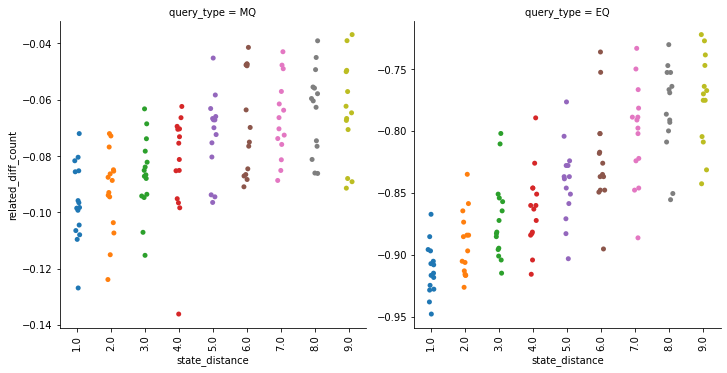

In [29]:
plot_diff_state_distance(related_df_q100_m)